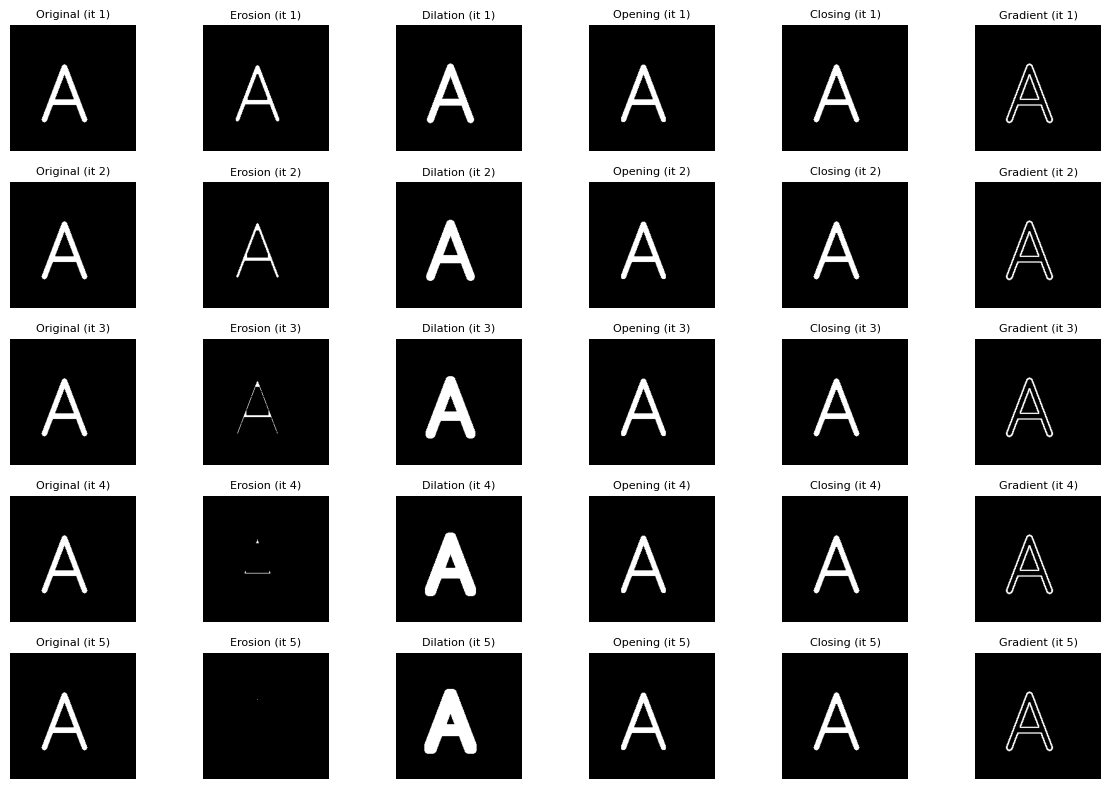

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

ourcwd = os.getcwd().split(os.sep)
ourcwd.pop()
imgpath = os.path.join(os.sep.join(ourcwd), 'image/binary_A.png')

binary = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)

# Prepare lists
images = []
titles = []

for iteration in range(5):
    erosion = cv2.erode(binary, kernel, iterations=iteration+1)
    dilation = cv2.dilate(binary, kernel, iterations=iteration+1)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)

    # Append one by one (not as a nested list)
    images.extend([binary, erosion, dilation, opening, closing, gradient])
    titles.extend([
        f'Original (it {iteration+1})',
        f'Erosion (it {iteration+1})',
        f'Dilation (it {iteration+1})',
        f'Opening (it {iteration+1})',
        f'Closing (it {iteration+1})',
        f'Gradient (it {iteration+1})'
    ])

# Show results
plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(5, 6, i+1)  # 3 rows, 6 columns
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()
